NAME: __TODO: FULLNAME__

# Machine Learning Practice - Asynchronous
## Homework 02

### Objectives
* Implement classes in Python
* Construct Data Pre-processing Pipelines that perform:
  + Imputing
  + Filtering

### Instructions
* Read the code below 
* For any cell that is flagged as *TODO*, complete the code according to the specifications
* Execute each cell and verify that it is showing correct results
* Hand-In Procedure
  + Make sure that your notebook has been saved
  + Download this file to your local machine (extension: .ipynb)
  + Submit to the Gradscope Notebook HW02 dropbox
  
### General References
(there are hints here)
* [Sci-kit Learn Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
* [Sci-kit Learn Impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute)
* [Sci-kit Learn Preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
* [Pandas Interpolate](https://pandas.pydata.org/pandas-docs/version/0.16/generated/pandas.DataFrame.interpolate.html)
* [Pandas fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [80]:
# EXECUTE CELL

#Import required packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Default figure parameters
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['figure.constrained_layout.use'] = True


# LOAD DATA

In [81]:
# EXECUTE CELL
fname ="subject_k1_w10_hw2.csv"

baby_data_raw = pd.read_csv(fname)
baby_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           15000 non-null  float64
 1   left_wrist_x   13458 non-null  float64
 2   left_wrist_y   13454 non-null  float64
 3   left_wrist_z   13454 non-null  float64
 4   right_wrist_x  13514 non-null  float64
 5   right_wrist_y  13514 non-null  float64
 6   right_wrist_z  13514 non-null  float64
dtypes: float64(7)
memory usage: 820.4 KB


In [82]:
""" 
EXECUTE CELL
"""
baby_data_raw.describe()

,time,left_wrist_x,left_wrist_y,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z
count,15000.000000,13458.000000,13454.000000,13454.000000,13514.000000,13514.000000,13514.000000
mean,149.990000,0.243580,0.162076,-0.044767,0.271218,-0.120768,-0.207248
std,86.605427,0.084823,0.093114,0.060566,0.055190,0.047123,0.054263
min,0.000000,0.027525,-0.046680,-0.186060,0.081230,-0.275120,-0.311197
25%,74.995000,0.177911,0.096319,-0.082849,0.238649,-0.140773,-0.245453
50%,149.990000,0.251879,0.154445,-0.045112,0.277339,-0.111330,-0.216992
75%,224.985000,0.308732,0.245144,-0.004720,0.314673,-0.085764,-0.158773
max,299.980000,0.389957,0.334027,0.147053,0.396959,-0.040851,-0.007693


In [83]:
""" TODO
Call head() on the data to observe the first few examples
"""
baby_data_raw.head()

,time,left_wrist_x,left_wrist_y,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z
0,0.00,NaN,0.293503,-0.092803,0.314738,-0.113438,-0.154972
1,0.02,NaN,0.293445,-0.092968,0.315143,-0.113476,-0.154807
2,0.04,NaN,NaN,NaN,0.315974,-0.113521,-0.154429
3,0.06,NaN,0.293285,-0.093356,0.316709,-0.113555,-0.154063
4,0.08,0.163611,0.293237,-0.093475,0.317206,-0.113534,-0.153886


In [84]:
""" TODO
Display the column names for the data
"""

column_names = baby_data_raw.columns

In [85]:
""" EXECUTE CELL

Determine whether any data are NaN. Use isna() and
any() to obtain a summary of which features have at 
least one missing value
"""
baby_data_raw.isna().any()

time             False
left_wrist_x      True
left_wrist_y      True
left_wrist_z      True
right_wrist_x     True
right_wrist_y     True
right_wrist_z     True
dtype: bool

# Create Pipeline Elements
In the lecture, some of the Pipeline components received or returned numpy arrays, while others retceived or returned pandas DataFrames. For this assignment, transform methods for all the Pipeline components will take input as a pandas DataFrame and return a DataFrame.

In [86]:
""" PROVIDED
Pipeline component object for selecting a subset of specified features
"""
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribs):
        self.attribs = attribs
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, X):
        '''
        :param X: a DataFrame
        :return: a DataFrame that contains the selected attributes
        '''
        return X[self.attribs]
 
"""
TODO 

Complete the Pipeline component object for interpolating and filling in 
gaps within the data. Whenever data are missing in between valid values, 
use interpolation to fill in the gaps. For example,
    1.2 NaN NaN 1.5 
becomes
    1.2 1.3 1.4 1.5 

Whenever data are missing on the edges of the data, fill in the gaps
with the first available valid value. For example,
    NaN NaN 2.3 3.6 3.2 NaN
becomes
    2.3 2.3 2.3 3.6 3.2 3.2
The transform() method you create must fill in the holes and the edge cases.

Hint: there are DataFrame methods that will help you implement these features
"""
class InterpolationImputer(BaseEstimator, TransformerMixin):
    def __init__(self, method='quadratic'):
        self.method = method
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, X): # TODO
        '''
        :param X: is a DataFrame
        :return: DataFrame without NaNs
        '''
        # TODO: Interpolate holes within the data
        Xout = X.interpolate(method=self.method)
        
        # TODO: Fill in the NaNs on the edges of the data
        Xout = Xout.fillna(method='bfill').fillna(method='ffill')
        
        # Return the imputed dataframe
        return Xout
    
"""
With our infant data, the sensors can give us somewhat noisy data, adding
an extra, high-frequency signal on top of our estimates of sensor positions.
One way to smooth out these high-frequency effects is to convolve our 
original signal with a smoothing kernel.  Here, we will use a Gaussian kernel.
This smoothing process reduces these noise effects, and generally improves 
subsequent analysis.  

With a Gaussian kernel, the value of output of the convolution at time t, 
x'[t], is a weighted average of the x[]'s around t, with the highest weight 
being for x[t], a lower weight for x[t-1] and x[t+1], an even lower weight for
x[t-2] and x[t+2], etc.  For the Gaussian kernel, we use the Gaussian (normal) 
distribution to determine what the weight for each point should be in 
our weighted average. The calculation of this is done for you.

Complete the GaussianFilter component object for smoothing specific features
using a Gaussian kernel. Here is the example formula for a filter of size k=7:
    x'[t] = ( w[0]*x[t-3] + w[1]*x[t-2] + w[2]*x[t-1] + w[3]*x[t]
           + w[4]*x[t+1] + w[5]*x[t+2] + w[6]*x[t+3])
                
This can be implemented similarly to how the derivative is computed, but will
require:
1. Before filtering, pad both ends of x with k//2 copies of the adjacent
value.  This will mean that the length of the vector
after convolution is the same as the original length of x.
For example:
                1.3 2.1 4.4 4.1 3.2
would be padded as follows:

    1.3 1.3 1.3 1.3 2.1 4.4 4.1 3.2 3.2 3.2 3.2
    
Note that we are assuming that our kernels lengths are odd.

2. Iterating over the k filter elements, rather than iterating over the 
samples in x.  Remember that for loops with many iterations in python 
are very inefficient relative to the loops inside of the numpy methods.

"""


def computeweights(length=3, sig=1):
    '''
    PROVIDED
    
    Computes the weights for a Gaussian filter kernel
    :param length: the number of terms in the filter kernel
    :param sig: the standard deviation (i.e. the scale) of the Gaussian
    :return: a vector of filter weights for the Gaussian kernel
    '''
    limit = 2.5
    x = np.linspace(-limit, limit, length)
    kernel = stats.norm.pdf(x, scale=sig)
    
    # Return the normalized kernel so that the sum is 1
    return kernel / kernel.sum()

'''
TODO

Complete the implementation of the Filter class
'''
class Filter(BaseEstimator, TransformerMixin):
    def __init__(self, attribs=None, kernel=[]):
        # Attributes to filter
        self.attribs = attribs
        
        # Number of kernel elements 
        self.kernelsize = kernel.shape[0]
        
        # Check that we have an odd kernel size
        if self.kernelsize % 2 == 0:
            raise Exception("Expecting an odd kernel size")

        # Standard deviation of the Gaussian
        #self.sig = sig
        
        # Compute the kernel element values
        self.weights = kernel
            
    def fit(self, x, y=None):
        return self
    
    def transform(self, X): # TODO
        '''
        :param X: is a DataFrame
        :return:: a DataFrame with the smoothed signals
        '''
        w = self.weights
        #ks = self.kernelsize
        # Create a copy of the original DataFrame
        Xout = X.copy()
        
        # Select all attributes if unspecified
        if self.attribs is None:
          self.attribs = Xout.columns
        
        # Iterate over the attributes
        for attrib in self.attribs:
            # Extract the numpy vector
            vals = Xout[attrib].values
            # TODO: pad signal at both the front and end of the vector so that after
            #   convolution, the length is the same as the lenght of vals.  Use 
            #   vals[0] and vals[-1] to pad the front and back, respectively.
            #   You may assume that the kernel size is always odd
            
            pad_size = self.kernelsize // 2 # integer division
            
            # Compute the front and back padding vectors
            frontpad =  np.full(pad_size,vals[0])
            backpad = np.full(pad_size,vals[-1])
            vals = np.concatenate((frontpad, vals, backpad))
            
            # TODO: apply filter
            # Implementation is the same as for the DerivativeComputer element, but
            #   more general.  You must iterate over the kernel elements.
            #   (NOTE: due to the wonky way indexing works in python, you will have
            #   specific code for one index & iterate over the remaining k-1 indices)
            
            
            # Filter window offset
            ofst = self.kernelsize - 1 
            # Last term
            avg = np.zeros(len(vals) - self.kernelsize + 1)
            
            # Rest of the terms
            for i in range(len(avg)):
                avg[i] += sum(vals[i + j] * w[j] for j in range(self.kernelsize))
            
            # replace noisy signal with filtered signal
            Xout[attrib] = pd.Series(avg)
            
        return Xout
    
""" 
PROVIDED

Pipeline component object for computing the derivative for specified features
"""
class DerivativeComputer(BaseEstimator, TransformerMixin):
    def __init__(self, attribs=None, prefix='d_', dt=1.0):
        self.attribs = attribs
        self.prefix = prefix
        self.dt = dt
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, X):
        '''
        :param X: a DataFrame
        :return: a DataFrame with additional features for the derivatives
        '''
        Xout = X.copy()
        if self.attribs is None:
            self.attribs = Xout.columns

        # Iterate over all of the attributes that we need to compute velocity over
        for attrib in self.attribs:
            # Extract the numpy array of data
            vals = Xout[attrib].values
            # Compute the difference between neighboring timeseries elements
            diff = vals[1:] - vals[0:-1]
            # Take into account the amount of time between timeseries samples
            deriv = diff / self.dt
            # Add a zero to the end so the resulting velocity vector is the same
            #   length as the position vector
            deriv = np.append(deriv, 0)
            
            # Add a new derivative attribute to the DataFrame
            attrib_name = self.prefix + attrib
            Xout[attrib_name] = pd.Series(deriv)

        return Xout

In [87]:
# TODO
# Create four different kernels: length is 41 and standard deviation is 0.5, 1, 2, and 4, respectively

#TODO
length=41
std_devs =[0.5,1,2,4]
kernels = [computeweights(length ,sig)for sig in std_devs]
kernels

[array([3.71679982e-07, 1.25737717e-06, 3.99593638e-06, 1.19296624e-05,
        3.34575657e-05, 8.81489450e-05, 2.18170734e-04, 5.07262155e-04,
        1.10796241e-03, 2.27339126e-03, 4.38207634e-03, 7.93491516e-03,
        1.34977454e-02, 2.15693357e-02, 3.23794079e-02, 4.56622840e-02,
        6.04926979e-02, 7.52843789e-02, 8.80163561e-02, 9.66670560e-02,
        9.97355978e-02, 9.66670560e-02, 8.80163561e-02, 7.52843789e-02,
        6.04926979e-02, 4.56622840e-02, 3.23794079e-02, 2.15693357e-02,
        1.34977454e-02, 7.93491516e-03, 4.38207634e-03, 2.27339126e-03,
        1.10796241e-03, 5.07262155e-04, 2.18170734e-04, 8.81489450e-05,
        3.34575657e-05, 1.19296624e-05, 3.99593638e-06, 1.25737717e-06,
        3.71679982e-07]),
 array([0.00221393, 0.00300254, 0.00400892, 0.00526962, 0.0068194 ,
        0.00868814, 0.01089737, 0.01345645, 0.01635889, 0.01957903,
        0.02306973, 0.02676136, 0.03056243, 0.03436226, 0.03803555,
        0.0414488 , 0.04446807, 0.04696764, 0.0488

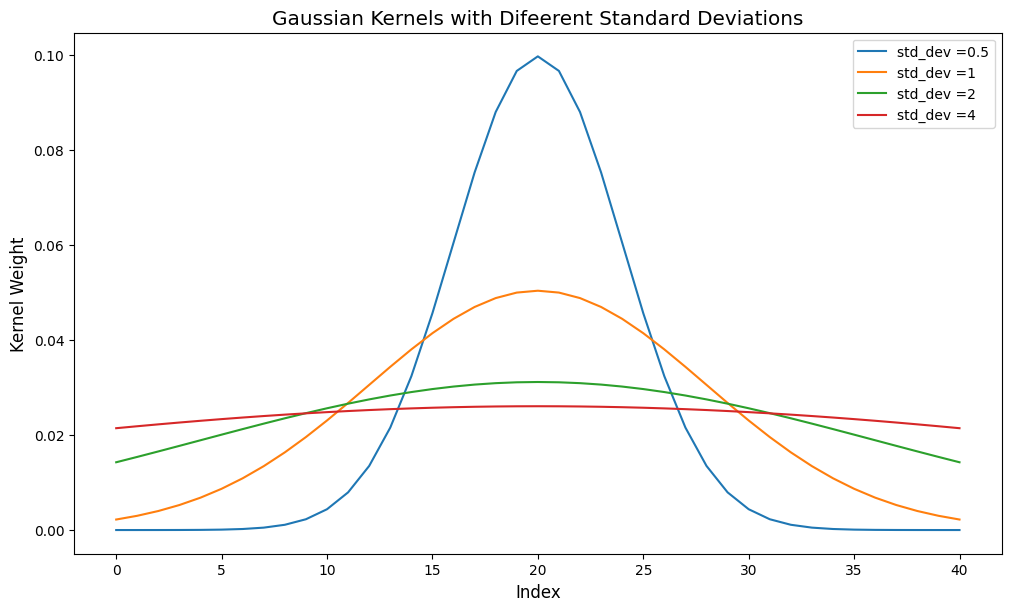

In [88]:
# TODO
# Plot each of the kernels on a single figure

# TODO
plt.figure(figsize=(10,6))

for i,kernel in enumerate(kernels):
    plt.plot(kernel,label = f'std_dev ={std_devs[i]}') 
    
plt.title("Gaussian Kernels with Difeerent Standard Deviations")
plt.xlabel('Index')
plt.ylabel('Kernel Weight')
plt.legend()

# Construct Pipeline

In [89]:
""" 
#TODO

#Set up convenience variables. Use the Z component of both wrists as features.
"""

# List of names of the right wrist columns
selected_names = ['right_wrist_z'] 

nselected = len(selected_names)
nselected

1

In [90]:
""" 
#TODO

Create a pipeline that:
1. Selects a subset of features specified above
2. Fills gaps within the data by linearly interpolating the values 
   in between existing data and fills the remaining gaps at the edges
   of the data with the first or last valid value
3. Computes the derivatives of the selected features. The data are 
   sampled at 50 Hz, therefore, the period or elapsed time (dt) between 
   the samples is .02 seconds (dt=.02)
"""
# Create pipeline elements



# Create the pipeline
pipe1 = Pipeline([
 ('selector', DataFrameSelector(selected_names)),
 ('interpolator', InterpolationImputer(method ='linear')),
 ('derivative', DerivativeComputer(attribs=selected_names,dt=0.02))
])

""" TODO
Create a pipeline that:
1. Selects a subset of features specified above
2. Fills gaps within the data by linearly interpolating the values 
   in between existing data and fills the remaining gaps at the edges
   of the data with the first or last valid value
3. Smooths the data with a Gaussian Filter. Use a standard deviation 
   of 6 and a kernel size of 11 for the filter
4. Compute the derivatives of the selected features. The data are 
   sampled at 50 Hz, therefore, the period or elapsed time (dt) between 
   the samples is .02 seconds (dt=.02)
"""
kernel_size =11
std_dev = 6
gaussian_kernel =computeweights(length =kernel_size,sig=std_dev)


pipe2 = Pipeline([
   # TODO
   ('selector', DataFrameSelector(selected_names)),
   ('interpolator', InterpolationImputer(method ='linear')),
   ('smoother',Filter(attribs=selected_names,kernel=gaussian_kernel)),
   ('derivative', DerivativeComputer(attribs=selected_names,dt=0.02))
])

In [91]:
""" TODO

Use the appropriate pipeline elements to extract the selected raw kinematic data and time
"""

dfs = DataFrameSelector(selected_names)


baby_data0 = dfs.fit_transform(baby_data_raw)
timeselector = DataFrameSelector(['time'])
time_df = timeselector.fit_transform(baby_data_raw)

baby_data0.head(), time_df.head()

(   right_wrist_z
 0      -0.154972
 1      -0.154807
 2      -0.154429
 3      -0.154063
 4      -0.153886,
    time
 0  0.00
 1  0.02
 2  0.04
 3  0.06
 4  0.08)

In [92]:
# EXECUTE CELL

baby_data0.describe()

,right_wrist_z
count,13514.000000
mean,-0.207248
std,0.054263
min,-0.311197
25%,-0.245453
50%,-0.216992
75%,-0.158773
max,-0.007693


In [93]:
# EXECUTE CELL
time_df.describe()

,time
count,15000.000000
mean,149.990000
std,86.605427
min,0.000000
25%,74.995000
50%,149.990000
75%,224.985000
max,299.980000


In [94]:
""" TODO

Fit both Pipelines to the data and transform the data
"""
baby_data1 = pipe1.fit_transform(baby_data_raw)
baby_data2 = pipe2.fit_transform(baby_data_raw)

baby_data1.head(), baby_data2.head()

(   right_wrist_z  d_right_wrist_z
 0      -0.154972          0.00825
 1      -0.154807          0.01890
 2      -0.154429          0.01830
 3      -0.154063          0.00885
 4      -0.153886          0.00245,
    right_wrist_z  d_right_wrist_z
 0      -0.154629         0.005482
 1      -0.154519         0.005935
 2      -0.154400         0.006479
 3      -0.154271         0.006607
 4      -0.154139         0.006705)

In [95]:
""" 
EXECUTE CELL

Display the summary statistics for the data
from both pipelines
"""
baby_data1.describe() 

,right_wrist_z,d_right_wrist_z
count,15000.000000,15000.000000
mean,-0.207421,-0.000520
std,0.054196,0.066156
min,-0.311197,-0.713900
25%,-0.245478,-0.016150
50%,-0.217102,-0.001100
75%,-0.158881,0.012263
max,-0.007693,0.632800


In [96]:
# EXECUTE CELL

baby_data2.describe() 

,right_wrist_z,d_right_wrist_z
count,15000.000000,15000.000000
mean,-0.207421,-0.000521
std,0.054068,0.054260
min,-0.310862,-0.429236
25%,-0.245533,-0.015743
50%,-0.216895,-0.001077
75%,-0.158823,0.011888
max,-0.009890,0.395041


In [97]:
""" TODO

Display the first 10 values for the data
from each pipeline
"""
 #TODO
baby_data1_head = baby_data1.head(10)

baby_data1_head

,right_wrist_z,d_right_wrist_z
0,-0.154972,0.00825
1,-0.154807,0.01890
2,-0.154429,0.01830
3,-0.154063,0.00885
4,-0.153886,0.00245
5,-0.153837,0.00245
6,-0.153788,0.00470
7,-0.153694,0.00605
8,-0.153573,0.00150
9,-0.153543,0.00160


In [98]:
baby_data2_head = baby_data2.head(10)
baby_data2_head

,right_wrist_z,d_right_wrist_z
0,-0.154629,0.005482
1,-0.154519,0.005935
2,-0.154400,0.006479
3,-0.154271,0.006607
4,-0.154139,0.006705
5,-0.154005,0.006564
6,-0.153873,0.006216
7,-0.153749,0.004877
8,-0.153651,0.004223
9,-0.153567,0.004580


In [99]:
""" TODO
Display the last 10 values for the data
from each pipeline
"""
 #TODO
baby_data1_tail = baby_data1.tail(10)

baby_data1_tail

,right_wrist_z,d_right_wrist_z
14990,-0.308057,-0.043225
14991,-0.308922,-0.043225
14992,-0.309786,-0.033750
14993,-0.310461,-0.014650
14994,-0.310754,-0.001100
14995,-0.310776,0.002500
14996,-0.310726,-0.003600
14997,-0.310798,-0.002500
14998,-0.310848,-0.004050
14999,-0.310929,0.000000


In [100]:
#TODO
baby_data2_tail = baby_data2.tail(10)
baby_data2_tail

,right_wrist_z,d_right_wrist_z
14990,-0.308105,-0.025868
14991,-0.308623,-0.024531
14992,-0.309113,-0.022284
14993,-0.309559,-0.019951
14994,-0.309958,-0.016375
14995,-0.310286,-0.012818
14996,-0.310542,-0.008884
14997,-0.310720,-0.005036
14998,-0.310820,-0.002083
14999,-0.310862,0.000000


C:\Users\kiran\AppData\Local\Temp\ipykernel_6656\1235351582.py:60: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


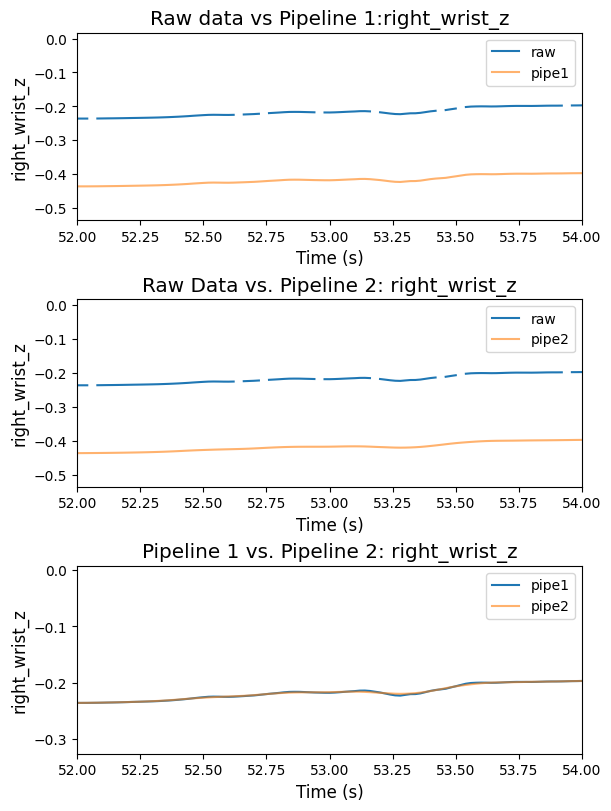

In [101]:
""" TODO
For each selected feature, construct plots comparing the raw data 
to the data from both pipelines. For each selected 
feature, create a figure displaying the raw data and the cleaned 
data in the same subplot. There should be three subplots per feature 
figure. Each subplot is in a separate row.
    subplot(1) will compare the original raw data to the pipeline1 
               pre-processed data.  Vertically offset the two curves
    subplot(2) will compare the original raw data to the pipeline2 
               pre-processed data.  Vertically offset the two curves
    subplot(3) will compare pipeline1 to pipeline2. DO NOT OFFSET
                THE TWO CURVES
    
    Set the x limit 52-54 seconds.

For all subplots, include axis labels, legends and titles.
"""

xlim = [52,54]
Xsel_raw = baby_data0.values
xsel_clean1 = baby_data1.values
xsel_clean2 = baby_data2.values
time = time_df.values

# Iterate over the features
for f, fname in enumerate(selected_names):
    # Create a figure with 3 sub-panels
    fig, axs = plt.subplots(3,1, figsize=(6,8))
    axs = axs.ravel()
    
    # PIPELINE 1
    axs[0].plot(time,Xsel_raw[:,f], label='raw')
    axs[0].plot(time ,xsel_clean1[:,f]- 0.2, label='pipe1', alpha=0.6)
    axs[0].set_xlim(xlim)
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel(fname)
    axs[0].legend()
    axs[0].set_title(f"Raw data vs Pipeline 1:{fname}")

    # PIPELINE 2
    # TODO
    axs[1].plot(time, Xsel_raw[:, f], label='raw')
    axs[1].plot(time, xsel_clean2[:, f] - 0.2, label='pipe2', alpha=0.6)  # vertically offsetting by 0.2
    axs[1].set_xlim(xlim)
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel(fname)
    axs[1].legend()
    axs[1].set_title(f"Raw Data vs. Pipeline 2: {fname}")

    # PIPELINE 1 VS PIPELINE 2
    # TODO
    axs[2].plot(time, xsel_clean1[:, f], label='pipe1')
    axs[2].plot(time, xsel_clean2[:, f], label='pipe2', alpha=0.6)
    axs[2].set_xlim(xlim)
    axs[2].set_xlabel("Time (s)")
    axs[2].set_ylabel(fname)
    axs[2].legend()
    axs[2].set_title(f"Pipeline 1 vs. Pipeline 2: {fname}")
    
    plt.tight_layout()
    plt.show()
    

C:\Users\kiran\AppData\Local\Temp\ipykernel_6656\3294956621.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


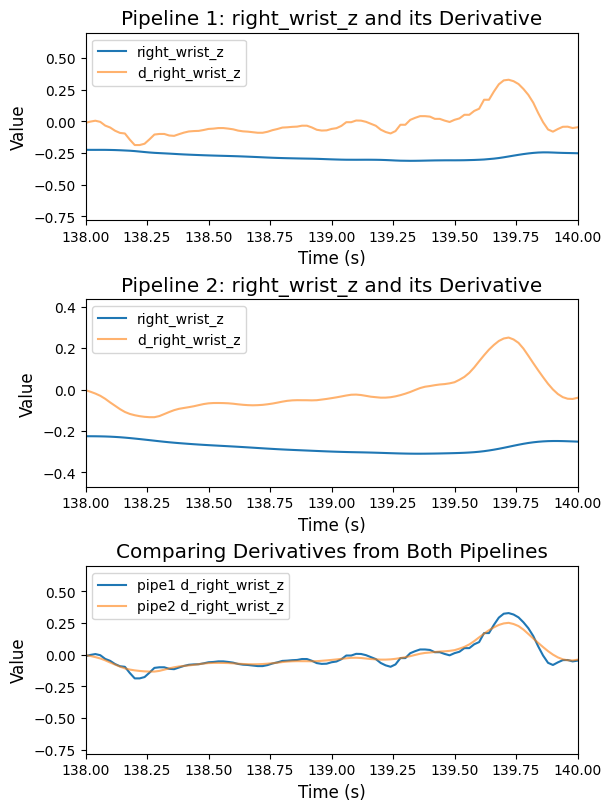

In [102]:
""" TODO
Construct plots for each position feature and its 
derivative from both pipelines. Each figure should have 
3 subplots:
    1: the pipeline1 feature data and cooresponding derivative 
    2: the pipeline2 feature data and corresponding derivative
    3: pipeline1 derivative and pipeline2 derivative. 
    
Set the x limit to 138-140 seconds.

For all subplots, include axis labels, legends and titles.
"""
time_array = time_df.values.squeeze()
xlim = [138,140]
# Iterate over the features
for f, fname in enumerate(selected_names):
    d_fname = 'd_' + fname
    fig, axs = plt.subplots(3,1,figsize=(6,8))
    axs = axs.ravel()
    
    # PIPELINE 1
    #TODO
    axs[0].plot(time_array, baby_data1.values[:, f], label=fname)
    axs[0].plot(time_array, baby_data1.values[:, f + nselected], label=d_fname, alpha=0.6)
    axs[0].set_xlim(xlim)
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Value")
    axs[0].legend()
    axs[0].set_title(f"Pipeline 1: {fname} and its Derivative")

    # PIPELINE 2
    # TODO
    axs[1].plot(time_array, baby_data2.values[:, f], label=fname)
    axs[1].plot(time_array, baby_data2.values[:, f + nselected], label=d_fname, alpha=0.6)
    axs[1].set_xlim(xlim)
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Value")
    axs[1].legend()
    axs[1].set_title(f"Pipeline 2: {fname} and its Derivative")
    
    # DERIVATIVES
    # TODO
    axs[2].plot(time_array, baby_data1.values[:, f + nselected], label=f'pipe1 {d_fname}')
    axs[2].plot(time_array, baby_data2.values[:, f + nselected], label=f'pipe2 {d_fname}', alpha=0.6)
    axs[2].set_xlim(xlim)
    axs[2].set_xlabel("Time (s)")
    axs[2].set_ylabel("Value")
    axs[2].legend()
    axs[2].set_title(f"Comparing Derivatives from Both Pipelines")
    
    plt.tight_layout()
    plt.show()


## Reflection

Answer the following questions

1. Explain the difference between the blue and green curves in the very last panel of the above figure (with velocities)

TODO

2. Explain the difference between the blue and black curves of the top panel of the position figure

TODO


3. Referring to the kernel plot: does the kernel with std 0.5 or the kernel with std 4 perform more smoothing?  Explain.

TODO



In [103]:
#1) Blue curve shows the velocity obtained pipelime 1 ,  Orange curve show velocity from pipeline 2.

    
#2) Differences came from the interpolation in Pipeline 1, filling gaps in raw data. 


#3) Larger in std means more in the spread out,so technically std 4 gives more smoothing than the 0.5.